# Logistic Regression on Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


# Data pre-processing

In [7]:
# duplicates
df_train.duplicated().sum()
df_test.duplicated().sum()

0

In [8]:
# null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# drop cabin column
df_train.drop("Cabin", axis=1, inplace = True)
df_test.drop("Cabin", axis=1, inplace = True)

In [11]:
# replace missing values in age column by mean
df_train['Age'].replace(np.nan, df_train['Age'].mean(), inplace=True)
df_test['Age'].replace(np.nan, df_test['Age'].mean(), inplace=True)

In [12]:
df_train['Embarked'].replace(np.nan,df_train['Embarked'].mode()[0],inplace=True)

In [13]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df_test['Fare'].replace(np.nan, df_test['Fare'].mean(), inplace=True)

In [15]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

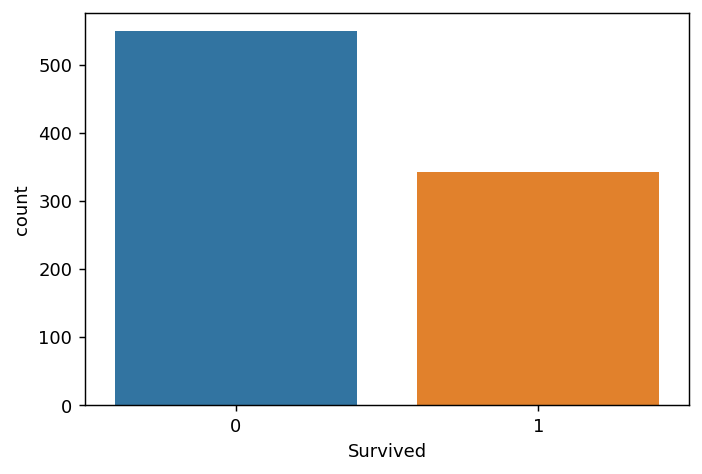

In [16]:
plt.figure(dpi=130)
sns.countplot(x="Survived", data = df_train)

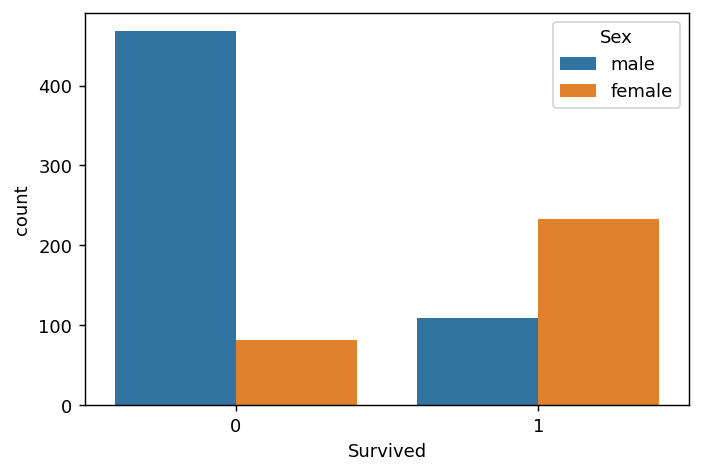

In [17]:
plt.figure(dpi=130)
sns.countplot(x="Survived",hue="Sex",data=df_train)

In [18]:
menSurvival= df_train[df_train.Sex == "male"] ["Survived"]
menSurvivalRate=sum(menSurvival)/len(menSurvival)*100
print(menSurvivalRate)

18.890814558058924


In [19]:
result = df_train.groupby("Sex")["Survived"].value_counts(normalize=True)
result

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [20]:
print("Women survived: ", result[0]*100)
print("Women nottsurvived: ", result[1]*100)
print("Men survived: ", result[3]*100)
print("Men nottsurvived: ", result[2]*100)

Women survived:  74.20382165605095
Women nottsurvived:  25.796178343949045
Men survived:  18.890814558058924
Men nottsurvived:  81.10918544194108


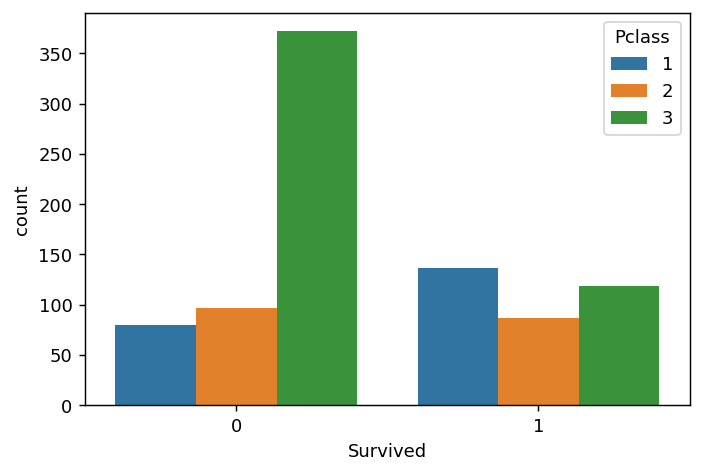

In [21]:
plt.figure(dpi=130)
sns.countplot(x="Survived",hue="Pclass",data=df_train)

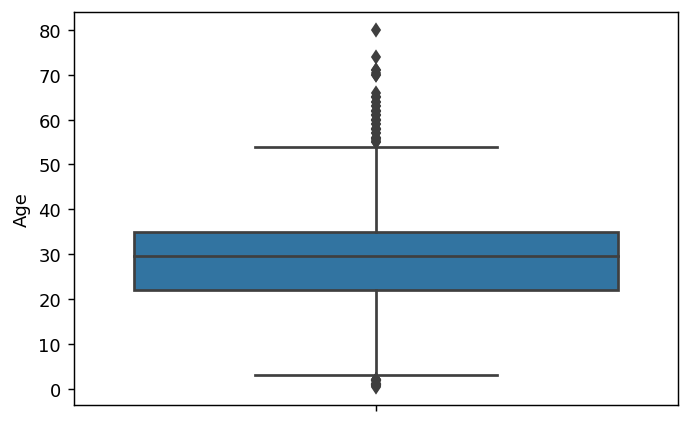

In [22]:
plt.figure(dpi=130)
sns.boxplot(y="Age",data=df_train)

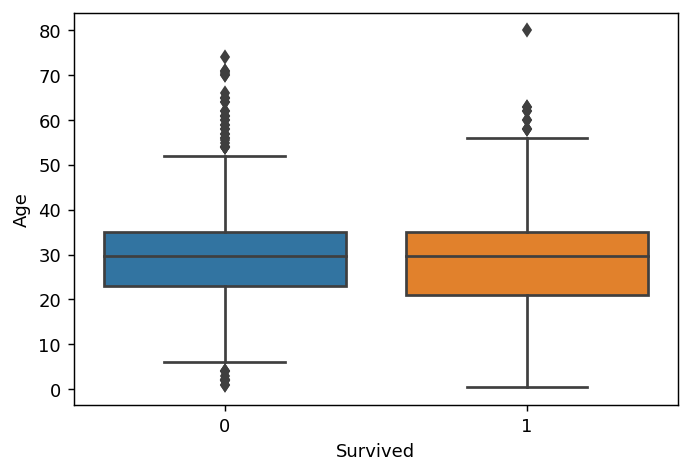

In [23]:
plt.figure(dpi=130)
sns.boxplot(x="Survived", y="Age",data=df_train)

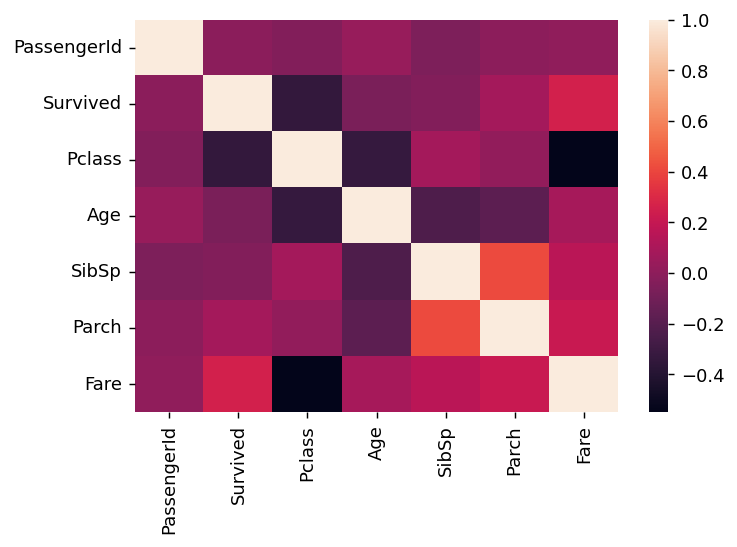

In [24]:
plt.figure(dpi=130)
sns.heatmap(df_train.corr())

# Categorical columns

In [25]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [26]:
df_train["Sex"] = df_train["Sex"].map({'female':1, 'male':0}).astype(int)
df_test["Sex"] = df_test["Sex"].map({'female':1, 'male':0}).astype(int)

In [27]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C


In [28]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,S


In [29]:
df_train["Embarked"]=df_train["Embarked"].map({'S':0,'C':1,'Q':2}).astype(int)

In [30]:
df_test["Embarked"]=df_test["Embarked"].map({'S':0,'C':1,'Q':2}).astype(int)

In [31]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [32]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [33]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [34]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [35]:
# dropping Name & Ticket columns
df_train.drop(['Name','Ticket'],axis=1,inplace=True)
df_test.drop(['Name','Ticket'],axis=1,inplace=True)

In [36]:
print(df_train.columns)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [37]:
print(df_train.head(3))
print(df_test.head(3))

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         0
1            2         1       1    1  38.0      1      0  71.2833         1
2            3         1       3    1  26.0      0      0   7.9250         0
   PassengerId  Pclass  Sex   Age  SibSp  Parch    Fare  Embarked
0          892       3    0  34.5      0      0  7.8292         2
1          893       3    1  47.0      1      0  7.0000         0
2          894       2    0  62.0      0      0  9.6875         2


# Binning
- dividing the data into different values
- by binning age - if  we use  an array to store results, we only need 4 elements to store the results
- non linearity (noise) of data reduced
- reduce rannge of data column
- accuracy improved

In [38]:
dataset = [df_train, df_test]
for data in dataset:
  data.loc[data["Age"]<=20, 'Age'] = 0
  data.loc[(data["Age"]>20) & (data["Age"]<=40), 'Age'] = 1
  data.loc[(data["Age"]>40) & (data["Age"]<=60), 'Age'] = 2
  data.loc[data["Age"]>60, 'Age'] = 3

In [39]:
df_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [40]:
for data in dataset:
  data.loc[data["Fare"] <=8, 'Fare'] = 0
  data.loc[(data["Fare"]>8) & (data["Fare"] <=15), "Fare"] = 1
  data.loc[(data["Fare"]>15) & (data["Fare"] <=31), "Fare"] = 2
  data.loc[data["Fare"] >31, 'Fare'] = 3

In [41]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1.0,1,0,0.0,0
1,2,1,1,1,1.0,1,0,3.0,1
2,3,1,3,1,1.0,0,0,0.0,0
3,4,1,1,1,1.0,1,0,3.0,0
4,5,0,3,0,1.0,0,0,1.0,0
5,6,0,3,0,1.0,0,0,1.0,2
6,7,0,1,0,2.0,0,0,3.0,0
7,8,0,3,0,0.0,3,1,2.0,0
8,9,1,3,1,1.0,0,2,1.0,0
9,10,1,2,1,0.0,1,0,2.0,1


In [42]:
for data in dataset:
  data["Age"] = data["Age"].astype(int)
  data["Fare"] = data["Fare"].astype(int)

In [43]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,0
1,2,1,1,1,1,1,0,3,1
2,3,1,3,1,1,0,0,0,0
3,4,1,1,1,1,1,0,3,0
4,5,0,3,0,1,0,0,1,0
5,6,0,3,0,1,0,0,1,2
6,7,0,1,0,2,0,0,3,0
7,8,0,3,0,0,3,1,2,0
8,9,1,3,1,1,0,2,1,0
9,10,1,2,1,0,1,0,2,1


In [44]:
df_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,1,0,0,0,2
1,893,3,1,2,1,0,0,0
2,894,2,0,3,0,0,1,2
3,895,3,0,1,0,0,1,0
4,896,3,1,1,1,1,1,0
5,897,3,0,0,0,0,1,0
6,898,3,1,1,0,0,0,2
7,899,2,0,1,1,1,2,0
8,900,3,1,0,0,0,0,1
9,901,3,0,1,2,0,2,0


# Binning & Encoding
- Binning is converting a continuous values to categorical values
- Binning is many age to one mapping
- Encoding is categorical values to numerical values
- Encoding is many one to one mapping

In [45]:
#independent variables
x_train = df_train.drop(["Survived","PassengerId"], axis =1).values
#dependent variables
y_train = df_train["Survived"].values
# testing independent variables
x_test = df_test.drop("PassengerId", axis = 1).values

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(891, 7)
(891,)
(418, 7)


# Training

In [47]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x_train,y_train,test_size=0.2,random_state=5)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x1_train,y1_train)

LogisticRegression()

# Prediction

In [49]:
pred_training = classifier.predict(x1_train)
pred_testing = classifier.predict(x1_test)


In [50]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y1_train, pred_training)
test_acc = accuracy_score(y1_test, pred_testing)

In [51]:
print("Training: ", train_acc)
print("Testing: ", test_acc)

Training:  0.7963483146067416
Testing:  0.8268156424581006
